In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Sales_add.csv')

In [3]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.shape

(22, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [7]:
data.corr()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Sales_before_digital_add(in $),1.000000,-0.178668
Sales_After_digital_add(in $),-0.178668,1.000000


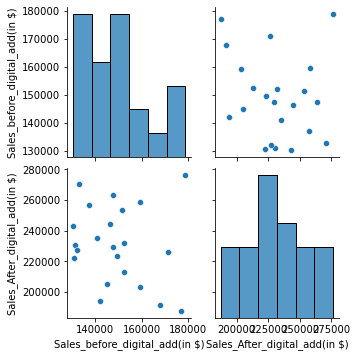

In [8]:
df = data[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']]

sns.pairplot(df, kind="scatter")
plt.show()

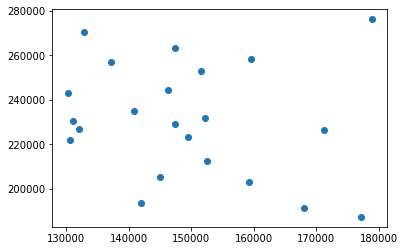

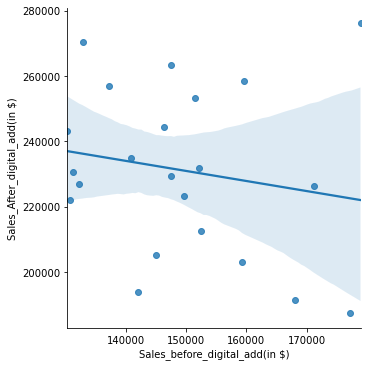

In [17]:
plt.scatter(data['Sales_before_digital_add(in $)'], data['Sales_After_digital_add(in $)'])
plt.show()
sns.lmplot(x="Sales_before_digital_add(in $)", y="Sales_After_digital_add(in $)", data=data);

In [10]:
np.corrcoef(data['Sales_before_digital_add(in $)'], data['Sales_After_digital_add(in $)'])

array([[ 1.        , -0.17866807],
       [-0.17866807,  1.        ]])

Since the r value is -0.178, we notice a negative correlation between Sales before and after digital marketing.

In [11]:
from scipy.stats import linregress
linregress(data['Sales_before_digital_add(in $)'], data['Sales_After_digital_add(in $)'])

LinregressResult(slope=-0.3076102707466516, intercept=277031.47009667254, rvalue=-0.17866807113459016, pvalue=0.42629790889113306, stderr=0.3787860687722732, intercept_stderr=56796.307743394944)

Since the p-value of 0.426 is greater than 0.05, we fail to reject the null hypothesis that the relationship between the sales before digital marketing and sales after digital marketing is not significant.

In [18]:
from scipy import stats
stats.pearsonr(data['Sales_before_digital_add(in $)'], data['Sales_After_digital_add(in $)'])

(-0.17866807113459016, 0.42629790889113345)

# Relationship Between Region and Manager

In [12]:
pd.crosstab(data.Region, data.Manager)

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [13]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(data.Region, data.Manager))

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

Since the p value(0.549) is greater than 0.05, we fail to reject the null hypothesis that the relationship between the Region and Manager is not significant.